## Comparing train and test set distributions

In order to get reliable predictions on test set, we need to make sure that the test data is distributed the same way as the training data does. If we do confirm that the data is equally distributed, this allows us to cross-validate on training set as well as

One way is to arrange a statistical test. A good option is Welch's t-test: it is used to test the hypothesis that two distributions have equal means and works well when two samples have unequal variances and sample sizes.

A downside of this approach is that we have to test features one by one.

On the other hand, we may use ML algorithms to see whether there's a significant different between train and test. We use the method described as Adversarial validation.

The idea is to mix training and test sets and to see if a classifier (a logistic regression or a decision tree) can separate one from the other.

In [ ]:
# Simple data preparation

train_d = train.drop(['id','loss'], axis=1)
test_d = test.drop(['id'], axis=1)

# To make sure we can distinguish between two classes
train_d['Target'] = 1
test_d['Target'] = 0

# We concatenate train and test in one big dataset
data = pd.concat((train_d, test_d))

# We use label encoding for categorical features:
data_le = deepcopy(data)
for c in range(len(cat_features)):
    data_le[cat_features[c]] = data_le[cat_features[c]].astype('category').cat.codes

# We use one-hot encoding for categorical features:
data = pd.get_dummies(data=data, columns=cat_features)

In [ ]:
data = data.iloc[np.random.permutation(len(data))]
data.reset_index(drop = True, inplace = True)

x = data.drop(['Target'], axis = 1)
y = data.Target

train_examples = 100000

x_train = x[:train_examples]
x_test = x[train_examples:]
y_train = y[:train_examples]
y_test = y[train_examples:]

In [ ]:
# Logistic Regression:
clf = LogisticRegression()
clf.fit(x_train, y_train)
pred = clf.predict_proba(x_test)[:,1]
auc = AUC(y_test, pred)
print("Logistic Regression AUC: {:.2%}".format(auc))





/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression AUC: 50.06%


As we see from the results above, ROC AUC score is close to 50.06%. Model not able to find difference between training and test set. This leads us to the thought that the training and test sets are drawn from the same distribution.

In [ ]:
# Shuffle train and test
data_le = data_le.iloc[np.random.permutation(len(data_le))]

In [ ]:
# And run PCA transformation
X = data_le.iloc[:, :130]
y = data_le.iloc[:, 130:]

pca = PCA(n_components=2)

X_reduced = pca.fit_transform(X)

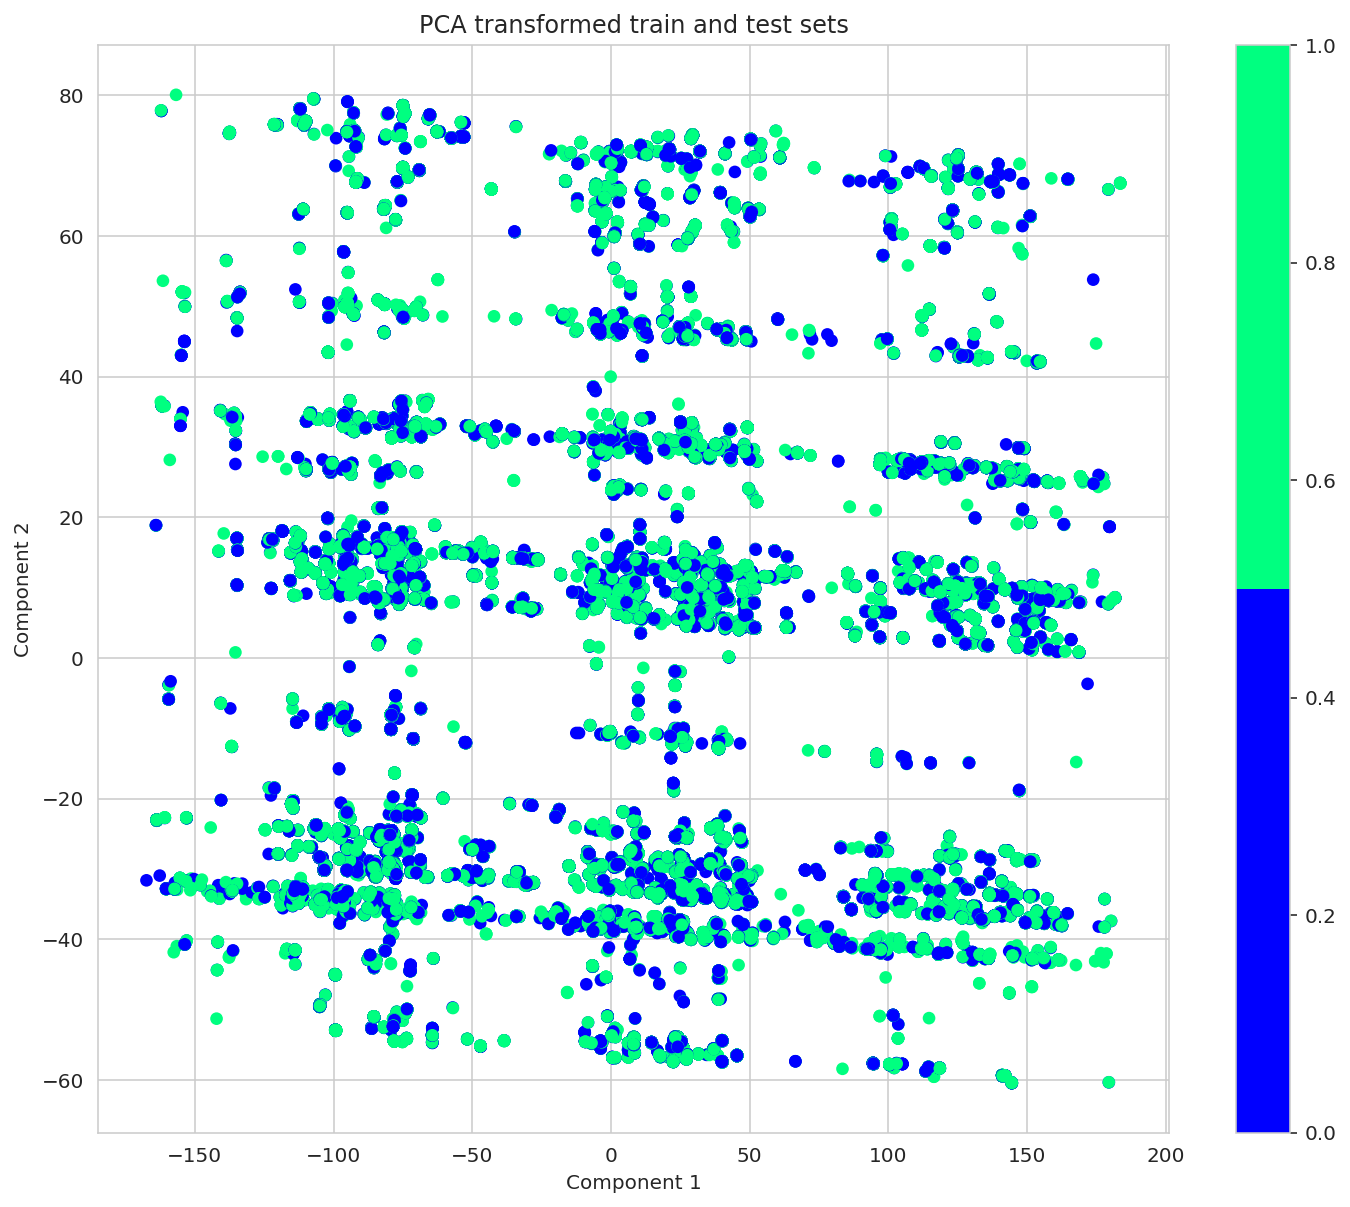

In [ ]:
# Train = 1, Test = 0
plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=np.array(y), 
            edgecolor='none', s=40,
            cmap=plt.cm.get_cmap('winter', 2))
plt.title('PCA transformed train and test sets')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()

As we see, green and blue labels (train and test examples respectively) are scattered across the space in similar manner and we can't spot any patterns which could help us distinguish one from the other.